# QUIZ 5 - Object Recognition: BoF vs ConvNetsTarefa

### Grupo: Luiz Gontijo, Marcos Vinicius, Matheus Pimenta

In [24]:
import numpy as np
import pickle
import cv2 as cv
from matplotlib import pyplot as plt

import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import metrics

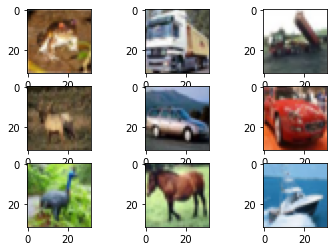

In [3]:
from keras.datasets import cifar10
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [44]:
img_rows, img_cols = 32, 32
epochs = 10
n_labels = 10
batches = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

Y_train_result = y_train
Y_test_result = y_test

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [46]:
#   one hot encode outputs

print(Y_train_result.shape)
y_train = np_utils.to_categorical(y_train, n_labels)
y_test = np_utils.to_categorical(y_test, n_labels)



(50000, 1)


In [16]:
# LeNet-5 (32x32)
model = Sequential()

#1 Conv
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 3)))

#2 Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#3 Conv
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))

#4 Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#5 Layers
model.add(Flatten())
model.add(Dense(120, activation='relu'))

# 6 Classificador
model.add(Dense(n_labels, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               123000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adadelta',
    metrics=['accuracy']
)

features = model.fit(X_train, batch_size=batches,epochs=epochs, verbose=1)

Epoch 1/10
5000/5000 [==============================] - 37s 7ms/step - loss: 2.2744 - accuracy: 0.1279 - val_loss: 2.2589 - val_accuracy: 0.1436
Epoch 2/10
5000/5000 [==============================] - 39s 8ms/step - loss: 2.2445 - accuracy: 0.1639 - val_loss: 2.2288 - val_accuracy: 0.1857
Epoch 3/10
5000/5000 [==============================] - 43s 9ms/step - loss: 2.2119 - accuracy: 0.2027 - val_loss: 2.1924 - val_accuracy: 0.2182
Epoch 4/10
5000/5000 [==============================] - 41s 8ms/step - loss: 2.1734 - accuracy: 0.2297 - val_loss: 2.1514 - val_accuracy: 0.2473
Epoch 5/10
5000/5000 [==============================] - 41s 8ms/step - loss: 2.1327 - accuracy: 0.2511 - val_loss: 2.1098 - val_accuracy: 0.2651
Epoch 6/10
5000/5000 [==============================] - 46s 9ms/step - loss: 2.0936 - accuracy: 0.2665 - val_loss: 2.0717 - val_accuracy: 0.2780
Epoch 7/10
5000/5000 [==============================] - 47s 9ms/step - loss: 2.0583 - accuracy: 0.2779 - val_loss: 2.0373 - val_ac

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_pred = model.predict_generator(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_test_result, y_pred))

/home/matheus/.local/lib/python3.8/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[497  31  27  31  14  35  35  51 164 115]
 [ 92 190   4  35   8  63  84  37 192 295]
 [159  19 123  62 108 176 168  72  54  59]
 [ 73  32  53 158  34 253 148 100  43 106]
 [ 78  13  89  50 147 167 289  69  34  64]
 [ 61  21  84 110  39 356 138  69  65  57]
 [ 20  23  41  61  51 123 522  79  21  59]
 [ 46  38  62  69  70 119  89 242  71 194]
 [267  34  10  26   2  55  16  22 351 217]
 [ 77  70   5  38   8  26  58  43 126 549]]


### CNN with Random Forest

In [42]:
# LeNet-5 (32x32)
model = Sequential()

#1 Conv
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 3)))

#2 Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#3 Conv
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))

#4 Pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#5 Layers
model.add(Flatten())

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adadelta',
    metrics=['accuracy']
)


In [49]:
# print(X_train.shape)
# print(y_train.shape)

model.fit(X_train, y_train, batch_size=batches,epochs=epochs, verbose=1, validation_data=(X_test, y_test))

# X_train_Pred = model.predict_generator(X_train)


Epoch 1/10


ValueError: in user code:

    /home/matheus/.local/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/matheus/.local/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/matheus/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/matheus/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/matheus/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/matheus/.local/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/matheus/.local/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /home/matheus/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/matheus/.local/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /home/matheus/.local/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/matheus/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/matheus/.local/lib/python3.8/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /home/matheus/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/matheus/.local/lib/python3.8/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/matheus/.local/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (10, 10) and (10, 1024) are incompatible
